# Spin-Spin Fitting, Analysis

In [20]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Fit CNOT, Ideal

In [28]:
model1 = loader("data/" + "spin-spin_cnot_degreeZero.model")
H_model1 = model1.channel.liouvillian.Hamiltonian

model2 = loader("data/" + "spin-spin_cnot_degreeOne.model")
H_model2 = model2.channel.liouvillian.Hamiltonian

model3 = loader("data/" + "spin-spin_cnot_degreeTwo.model")
H_model3 = model3.channel.liouvillian.Hamiltonian


In [29]:
print(H_model1.u.numpy())
print(H_model2.u.numpy())
print(H_model3.u.numpy())

[0.24229 0.00328 0.24229]
[ 0.86387 -1.499   -1.37662]
[ 1.66077 -1.25413 -1.15268]


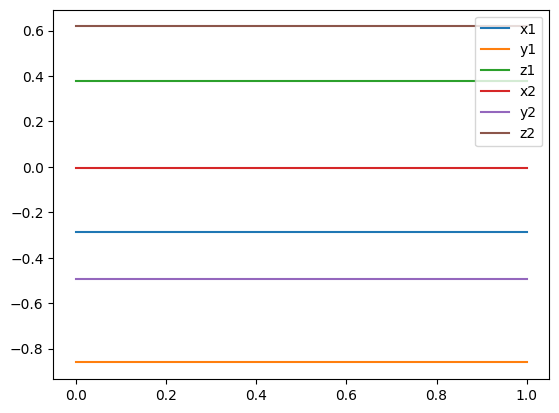

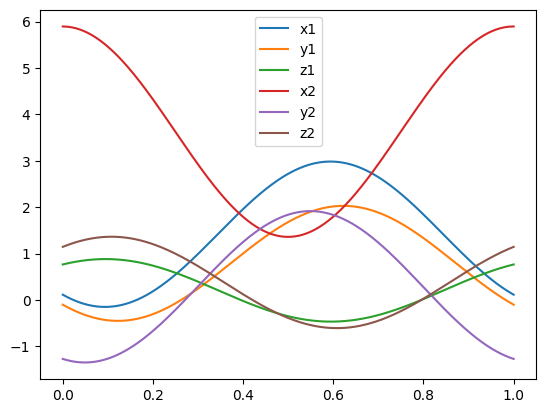

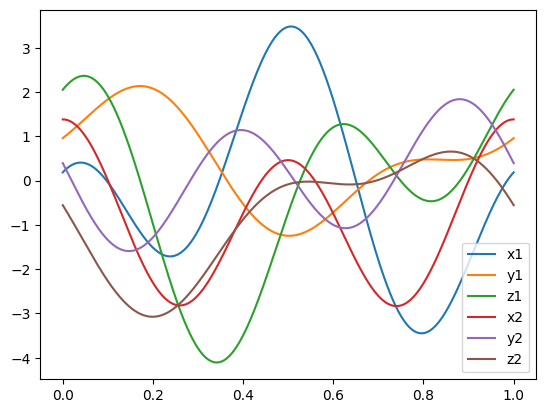

In [5]:
t, signal_list = H_model1.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model2.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model3.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

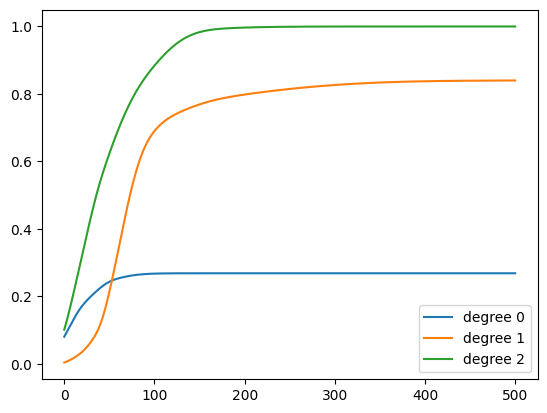

In [6]:
plt.plot(-np.array(model1.logger.loss_train_list), label="degree 0")
plt.plot(-np.array(model2.logger.loss_train_list), label="degree 1")
plt.plot(-np.array(model3.logger.loss_train_list), label="degree 2")
plt.legend()
plt.show()

## Fit Haar Random, Ideal

In [30]:
model1 = loader("data/" + "spin-spin_haarRandom_degreeZero.model")
H_model1 = model1.channel.liouvillian.Hamiltonian

model2 = loader("data/" + "spin-spin_haarRandom_degreeOne.model")
H_model2 = model2.channel.liouvillian.Hamiltonian

model3 = loader("data/" + "spin-spin_haarRandom_degreeTwo.model")
H_model3 = model3.channel.liouvillian.Hamiltonian


In [31]:
print(H_model1.u.numpy())
print(H_model2.u.numpy())
print(H_model3.u.numpy())

[ 0.00877 -0.67749  0.31086]
[ 0.10224 -0.03414  1.004  ]
[-0.494   -1.95551 -0.53727]


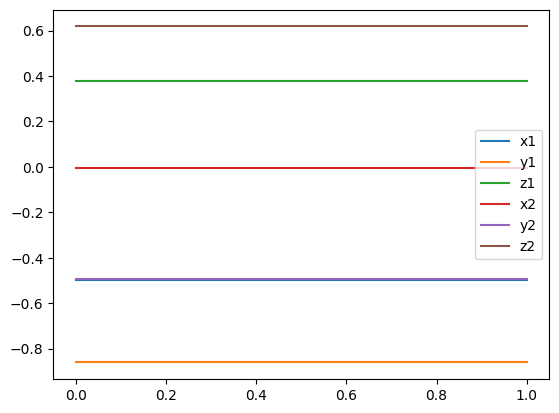

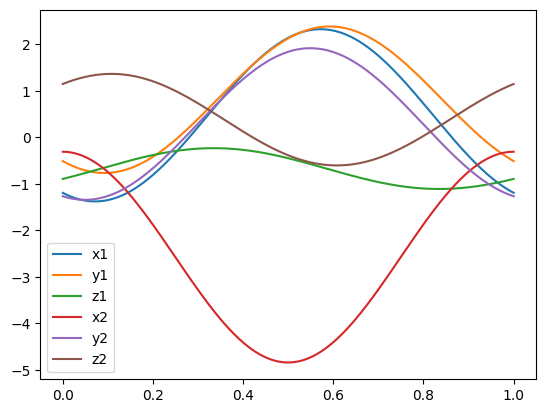

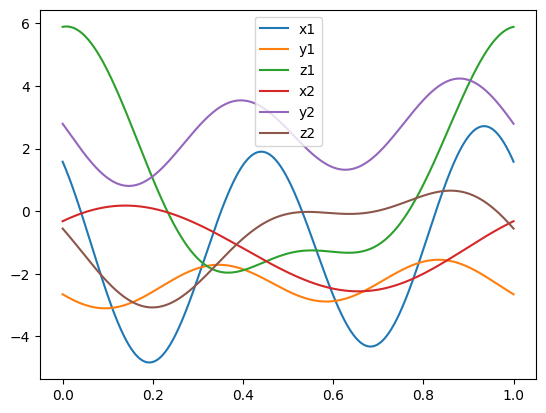

In [32]:
t, signal_list = H_model1.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model2.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model3.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

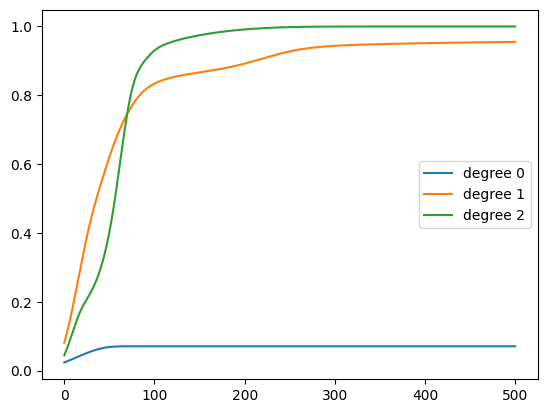

In [33]:
plt.plot(-np.array(model1.logger.loss_train_list), label="degree 0")
plt.plot(-np.array(model2.logger.loss_train_list), label="degree 1")
plt.plot(-np.array(model3.logger.loss_train_list), label="degree 2")
plt.legend()
plt.show()